# Laptop Analysis 

In this Project, I'm analysising a laptop dataset where I'm looking into the most expensive brands of laptops and why are they the most expensive. After Analysis, I will use mutiple machine learning models to classifiy brands of laptop based on their specifications of hardware. 


## Analysis Packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
laptop=pd.read_csv('Cleaned_Laptop_data.csv')
laptop.head(10)

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234
5,Avita,PURA,AMD,APU Dual,10th,8 GB GB,DDR4,256 GB,0 GB,Windows,...,14,0,No,No,24990,33490,25,3.7,1657,234
6,HP,APU,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,14,0,No,No,20900,22825,8,3.9,1185,141
7,Lenovo,APU,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,21896,0,0,3.9,219,18
8,HP,Athlon,AMD,Athlon Dual,10th,32 GB GB,DDR4,32 GB,0 GB,Windows,...,14,0,No,No,26899,27668,2,0.0,0,0
9,acer,Aspire,AMD,Athlon Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,1,No,No,31990,36990,13,4.2,76,13


After checking the prices of the laptops and the source of the data set, I noticed the prices were in Indian Rubies. I wanted to make price analysis on USD so I used the 2023 currency conversation rates to convert currencies.

In [3]:
laptop['latest_price']=laptop['latest_price']/73.9339
laptop['old_price']=laptop['old_price']/73.9339
laptop.head(10)

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,338.004623,443.504265,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,264.966409,288.433317,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,270.376647,378.581409,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,290.665040,378.581409,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,338.004623,452.972182,25,3.7,1657,234
5,Avita,PURA,AMD,APU Dual,10th,8 GB GB,DDR4,256 GB,0 GB,Windows,...,14,0,No,No,338.004623,452.972182,25,3.7,1657,234
6,HP,APU,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,14,0,No,No,282.684939,308.721710,8,3.9,1185,141
7,Lenovo,APU,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,296.156432,0.000000,0,3.9,219,18
8,HP,Athlon,AMD,Athlon Dual,10th,32 GB GB,DDR4,32 GB,0 GB,Windows,...,14,0,No,No,363.824984,374.226167,2,0.0,0,0
9,acer,Aspire,AMD,Athlon Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,1,No,No,432.683789,500.311765,13,4.2,76,13


From here, I did my standard analysis of the data set. First check the variable type of each column, size of the dataset, and if there is any null values. In this dataset, since I am focusing on the brand, I checked how any unique brands and the counr of each brand to see the distribution of the brands.

In [4]:
laptop.dtypes

brand               object
model               object
processor_brand     object
processor_name      object
processor_gnrtn     object
ram_gb              object
ram_type            object
ssd                 object
hdd                 object
os                  object
os_bit              object
graphic_card_gb      int64
weight              object
display_size        object
warranty             int64
Touchscreen         object
msoffice            object
latest_price       float64
old_price          float64
discount             int64
star_rating        float64
ratings              int64
reviews              int64
dtype: object

In [5]:
laptop.shape

(896, 23)

In this code, I wanted to check if the data had missing values so we can create clean graphs for explanatory data visulization.


In [6]:
laptop.isna().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

In [7]:
laptop.brand.unique()

array(['Lenovo', 'Avita', 'HP', 'acer', 'ASUS', 'DELL', 'RedmiBook',
       'realme', 'Infinix', 'MSI', 'lenovo', 'MICROSOFT', 'Smartron',
       'LG', 'Nokia', 'APPLE', 'Vaio', 'Mi', 'ALIENWARE', 'iball',
       'SAMSUNG'], dtype=object)

In [8]:
brand=laptop['brand'].value_counts()
brand

ASUS         254
DELL         154
Lenovo       148
HP           142
acer          58
MSI           52
APPLE         28
Avita         18
Vaio           5
LG             5
Nokia          4
ALIENWARE      4
realme         4
Infinix        4
lenovo         3
Smartron       3
MICROSOFT      3
RedmiBook      3
Mi             2
iball          1
SAMSUNG        1
Name: brand, dtype: int64

In the last two boxes, I checked to see how many different brands are in the dataset and how many of those brands are in the data set. By using the value_counts() we see that only four brand of laptops have more than 100 entries in the table.Those brans are ASUS, DELL, Lenovo, HP.

In [9]:
bran=brand.rename_axis("Brand").reset_index(name='counts')
bran['percent'] = (bran['counts'] / bran['counts'].sum()) * 100
bran

,Brand,counts,percent
0,ASUS,254,28.348214
1,DELL,154,17.187500
2,Lenovo,148,16.517857
3,HP,142,15.848214
4,acer,58,6.473214
5,MSI,52,5.803571
6,APPLE,28,3.125000
7,Avita,18,2.008929
8,Vaio,5,0.558036
9,LG,5,0.558036


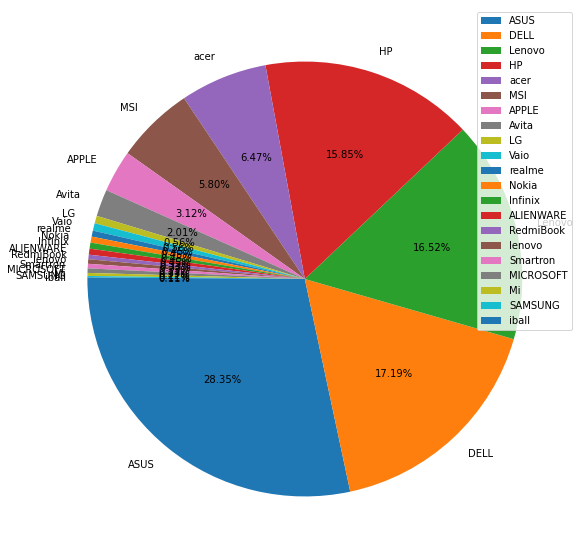

In [10]:
percent=bran["percent"]
brand=bran["Brand"]
f, ax = plt.subplots(1,1, figsize= (10,10))
ax.pie(percent,labels= brand,startangle= 180,autopct = '%1.2f%%')
ax.legend()

In the pie chart, I found that the data table has mostly ASUS, DELL, LENOVO, HP labtops. Since I want to classify each brand of laptop and I knowthat a small sample size of a brand might skeww the accuracy of the model, I decide to fitler the data to nonly include those four brands for analysis and model creation.


In [10]:
sm_laptop=laptop[(laptop.brand=='ASUS')|
                 (laptop.brand=='DELL')|
                 (laptop.brand=='Lenovo')|
                 (laptop.brand=='HP')]
sm_laptop=sm_laptop.reset_index()
sm_laptop

,index,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,...,Missing,0,No,No,338.004623,443.504265,23,3.7,63,12
1,1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,...,Missing,0,No,No,264.966409,288.433317,8,3.6,1894,256
2,6,HP,APU,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,1024 GB,...,14,0,No,No,282.684939,308.721710,8,3.9,1185,141
3,7,Lenovo,APU,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,1024 GB,...,Missing,0,No,No,296.156432,0.000000,0,3.9,219,18
4,8,HP,Athlon,AMD,Athlon Dual,10th,32 GB GB,DDR4,32 GB,0 GB,...,14,0,No,No,363.824984,374.226167,2,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,890,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,...,16,1,No,No,1839.345686,2339.792707,21,0.0,0,0
694,891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,...,16,1,No,No,1961.076042,2637.355800,25,0.0,0,0
695,892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,...,Missing,1,No,No,2028.704018,0.000000,0,0.0,0,0
696,893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,...,16,1,No,No,1934.024852,0.000000,0,0.0,0,0


# Visulizations and Analysis

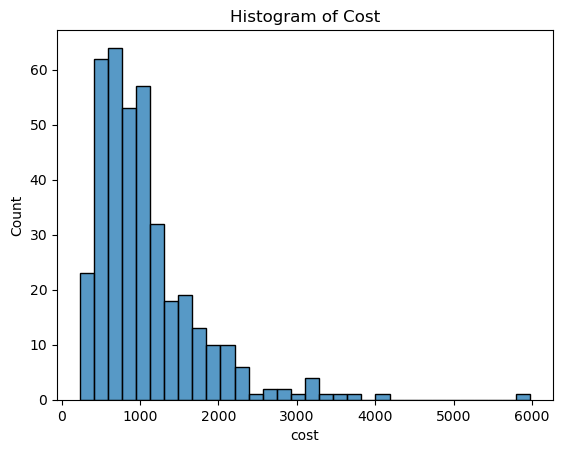

In [12]:
mean=sm_laptop['latest_price']
mean=mean.value_counts().rename_axis("cost").reset_index()
sns.histplot(x='cost',data=mean)
plt.title("Histogram of Cost")
plt.show()

In this histogram of cost of the four common brands, we can see that the cost follows a right skew shape where most of the cost of laptops are between $400-$1000

In [13]:
agg_func_describe = {'latest_price': ['describe']}
sm_laptop.groupby(['brand']).agg(agg_func_describe).round(2)

latest_price                                                           
           describe                                                           
              count     mean     std     min     25%     50%      75%      max
brand                                                                         
ASUS          254.0  1071.52  698.41  243.33  581.47  892.55  1349.04  5978.18
DELL          154.0   838.99  320.10  486.79  581.50  785.03   999.17  2434.47
HP            142.0   970.90  501.00  282.68  615.82  811.40  1227.99  3242.88
Lenovo        148.0   972.83  575.13  229.80  628.80  838.51  1071.77  3597.78

Using the describe function to reeive a statistical summary of the 4 laptop brands, we can see that Dell Laptops are the cheapest labtops on average and cheapeast laptop for their median. Asus Laptops in this summary has the most expensive laptops with one laptop costing almost $6000

In [14]:
sm=sm_laptop[(sm_laptop.latest_price>5000)]
sm=sm.reset_index()
sm

,level_0,index,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,503,636,ASUS,Zephyrus,Intel,Core i9,11th,16 GB GB,DDR4,3072 GB,...,Missing,1,No,No,5978.177805,0.0,0,5.0,1,1


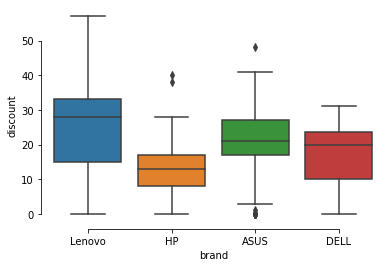

In [15]:
sns.boxplot(x="brand", y="discount", data=sm_laptop)
sns.despine(offset=5, trim=True)

In this boxplot, I wanted to see the distribution of discounts for each brand of laptop. Here we can see that Lenovo has the largest dsitribution of discounts out of the four and potentially has the most discount too.

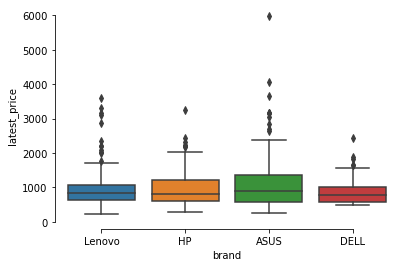

In [16]:
sns.boxplot(x="brand", y="latest_price", data=sm_laptop)
sns.despine(offset=5, trim=True)

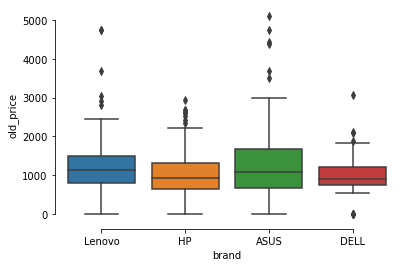

In [17]:
sns.boxplot(x="brand", y="old_price", data=sm_laptop)
sns.despine(offset=5, trim=True)

C:\Users\night\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


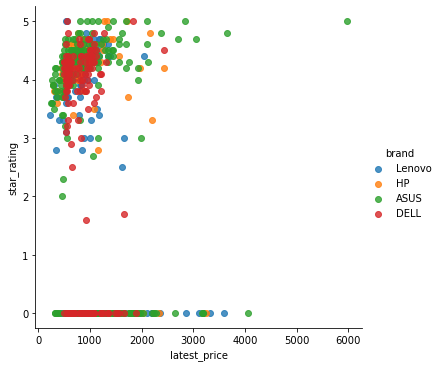

In [18]:
sns.lmplot('latest_price','star_rating',data=sm_laptop,hue='brand',fit_reg=False)
plt.show()

In this scatterplot, I was curious if the laptop brands star ratings would reveal certain groupings with their prices. This curiousity made me this plot which didn't show me much but I will come back to this when we're using kmeans model.

In [19]:
sm_laptop_gb=sm_laptop[(sm_laptop.ram_gb!="32 GB GB")]
sm_laptop_gb.reset_index()

,level_0,index,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,0,0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,...,Missing,0,No,No,338.004623,443.504265,23,3.7,63,12
1,1,1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,...,Missing,0,No,No,264.966409,288.433317,8,3.6,1894,256
2,2,6,HP,APU,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,...,14,0,No,No,282.684939,308.721710,8,3.9,1185,141
3,3,7,Lenovo,APU,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,...,Missing,0,No,No,296.156432,0.000000,0,3.9,219,18
4,5,10,ASUS,ExpertBook,Intel,Core i3,10th,4 GB GB,DDR4,0 GB,...,15.6,0,No,No,468.648347,567.939741,17,2.3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,693,890,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,...,16,1,No,No,1839.345686,2339.792707,21,0.0,0,0
693,694,891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,...,16,1,No,No,1961.076042,2637.355800,25,0.0,0,0
694,695,892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,...,Missing,1,No,No,2028.704018,0.000000,0,0.0,0,0
695,696,893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,...,16,1,No,No,1934.024852,0.000000,0,0.0,0,0


I removed the 32gb laptops because this hardware was linked with outliers and there isn't many 32gb laptops to EDV with.

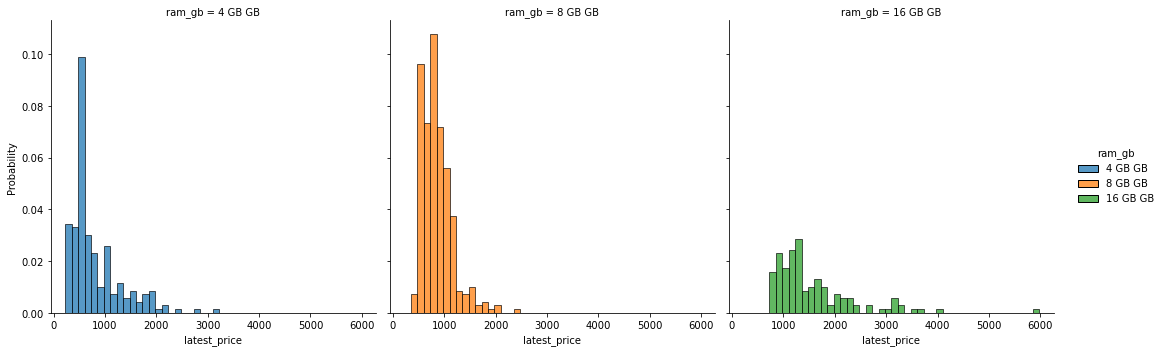

In [20]:
sns.displot(sm_laptop_gb, x="latest_price", hue="ram_gb", col="ram_gb",stat="probability")

In this graph, we are seeing the relationship between the amount of ram and the price of the labtop. For laptops with 16GB, We can see that the distribution starts at around 800 dollars and ends around 4000 dollars,It also includes the near 6000 outlier. For 8 GB laptops, the distribution is around 400-2000 dollars and 4GB starts around 300-2000 dollars. This means the amount of ram the laptop has the more the labtop will cost.

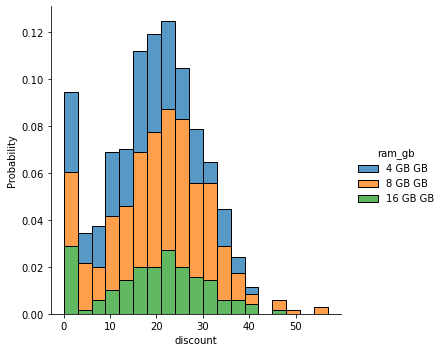

In [21]:
sns.displot(sm_laptop_gb, x="discount", hue="ram_gb", multiple="stack",stat="probability")

In this histogram, we can see that no matter what GB size the most common discount these laptops received is around 20%-30% 

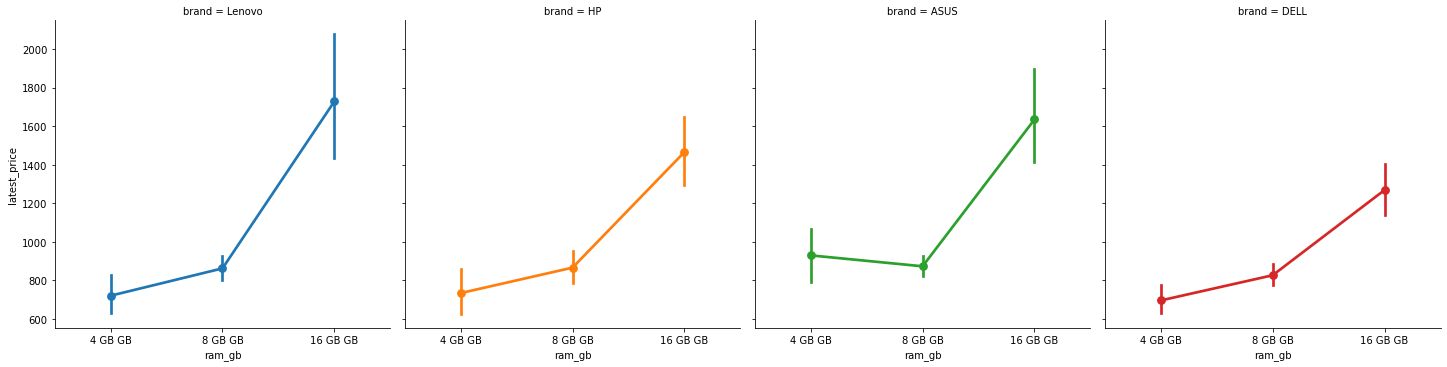

In [22]:
sns.catplot(x="ram_gb", y="latest_price",hue="brand", kind="point",col="brand", data=sm_laptop_gb)

In this graphic, we can see there is a dramatic price jump when a laptop has 16gb of ram when compared to their 8Gb of ram counterparts. Something to take notice is the price of ASUS laptops decrease when going from a 4BG labtop to a 8GB laptop on average. This could be because the latest prices include the discounts so this could mean 8GB laptops are more discounted.

## Machine Models Time

In this section, here is my interest of working machine learning models into this dataset. 

### K-means ratings

This section, we returned to the star ratings V price of laptops. Here, I want to use Kmeans as a way if the computer can identify four clusters that represent of the brands

In [23]:
x=sm_laptop["latest_price"]
y=sm_laptop["star_rating"]
data = pd.DataFrame({'latest_price':x,'Star_rating':y})

C:\Users\night\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[[6.12143189e+02 3.32944444e+00]
 [1.08206074e+03 2.79083333e+00]
 [1.82215037e+03 1.42804878e+00]
 [3.35840612e+03 1.51250000e+00]]


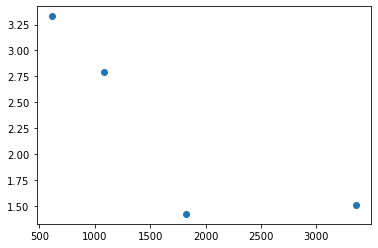

In [24]:
from sklearn.cluster import KMeans, MeanShift 


m1 = KMeans(4)
m1.fit(data)
print(m1.cluster_centers_)
plt.scatter(m1.cluster_centers_[:,0],m1.cluster_centers_[:,1])

After a few data changes, We have the graphic but I have issues about this clustering becasue of one point who has 1.50 star rating and a price of 3500. This could mean that laptops priced that high could have a low ratings but this requires more data or look into different features of the table.

In [25]:
from sklearn.preprocessing import OrdinalEncoder
column=list(sm_laptop.columns)
scaler = OrdinalEncoder()
names = sm_laptop.columns
d = scaler.fit_transform(sm_laptop)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head(10)

,index,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,0.0,3.0,11.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,...,12.0,0.0,0.0,0.0,14.0,18.0,23.0,16.0,57.0,12.0
1,1.0,3.0,36.0,0.0,1.0,0.0,2.0,1.0,0.0,3.0,...,12.0,0.0,0.0,0.0,3.0,1.0,8.0,15.0,230.0,105.0
2,2.0,2.0,13.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,...,3.0,0.0,0.0,0.0,6.0,3.0,8.0,18.0,212.0,83.0
3,3.0,3.0,13.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,...,12.0,0.0,0.0,0.0,8.0,0.0,0.0,18.0,135.0,18.0
4,4.0,2.0,16.0,0.0,2.0,0.0,1.0,1.0,6.0,0.0,...,3.0,0.0,0.0,0.0,17.0,12.0,2.0,0.0,0.0,0.0
5,5.0,0.0,25.0,1.0,4.0,0.0,2.0,1.0,0.0,1.0,...,8.0,0.0,0.0,0.0,37.0,37.0,17.0,4.0,3.0,0.0
6,6.0,3.0,43.0,1.0,4.0,0.0,2.0,1.0,0.0,1.0,...,12.0,0.0,0.0,0.0,55.0,38.0,8.0,17.0,58.0,5.0
7,7.0,3.0,71.0,1.0,4.0,0.0,2.0,1.0,0.0,1.0,...,8.0,0.0,0.0,0.0,60.0,47.0,9.0,10.0,8.0,1.0
8,8.0,0.0,25.0,1.0,5.0,0.0,3.0,1.0,7.0,0.0,...,12.0,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0
9,9.0,0.0,62.0,1.0,3.0,7.0,2.0,1.0,0.0,3.0,...,12.0,0.0,0.0,0.0,18.0,14.0,6.0,0.0,0.0,0.0


In order to use machine learning models, we are going to need to change a lot of the data to be numerical since A great majority of the models work best with numbers. Luckely, we have an ordinalcoder that changes all the data set to be numbers for model creation.

## Machine Learning Packages 

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [27]:
oversample = SMOTE()
features, labels=  oversample.fit_resample(scaled_df.drop(["brand"],axis=1),scaled_df["brand"])

SMOTE or Synthetic Minority Oversampling Technique is used to generate synthetic data for the minority class. In this context, its given for the other 3 varibles since ASUS has the most samples. 

In [28]:
X_train, X_test, y_train, y_test=train_test_split(features, labels,test_size=0.33,random_state=42)

Below, this is a code that uses loops different machine learning models and collects their results into a list. We want to do this so we can find which MLM is the best to classify the laptop brands based on their hardware.

In [29]:
models = [RandomForestClassifier(), KNeighborsClassifier(), SVC(), LogisticRegression(),xgb.XGBClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.72      0.79      0.75        80
         1.0       0.83      0.88      0.86        78
         2.0       0.91      0.87      0.89        89
         3.0       0.85      0.78      0.81        89

    accuracy                           0.83       336
   macro avg       0.83      0.83      0.83       336
weighted avg       0.83      0.83      0.83       336

------------------------------ 

model: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.53      0.49      0.51        80
         1.0       0.50      0.71      0.59        78
         2.0       0.60      0.58      0.59        89
         3.0       0.66      0.48      0.56        89

    accuracy                           0.56       336
   macro avg       0.57      0.57      0.56       336
weighted avg       0.58      0.56      0.56       336

------------------------------ 

mo

C:\Users\night\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model: LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.36      0.40      0.38        80
         1.0       0.37      0.33      0.35        78
         2.0       0.62      0.55      0.58        89
         3.0       0.47      0.51      0.49        89

    accuracy                           0.45       336
   macro avg       0.45      0.45      0.45       336
weighted avg       0.46      0.45      0.45       336

------------------------------ 

model: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weigh

In [30]:
model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.77      0.82      0.80        80
         1.0       0.77      0.90      0.83        78
         2.0       0.88      0.88      0.88        89
         3.0       0.91      0.72      0.81        89

    accuracy                           0.83       336
   macro avg       0.83      0.83      0.83       336
weighted avg       0.84      0.83      0.83       336



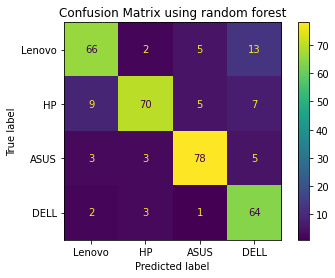

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["Lenovo","HP","ASUS","DELL"])
disp.plot()
plt.title("Confusion Matrix using random forest")
plt.show()

In [32]:
model=xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87        80
         1.0       0.80      0.87      0.83        78
         2.0       0.86      0.94      0.90        89
         3.0       0.91      0.78      0.84        89

    accuracy                           0.86       336
   macro avg       0.86      0.86      0.86       336
weighted avg       0.86      0.86      0.86       336



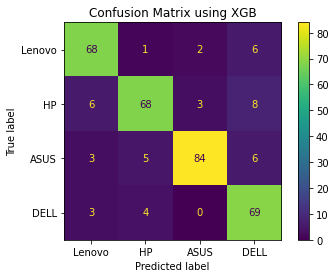

In [33]:
cm = confusion_matrix(model.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["Lenovo","HP","ASUS","DELL"])
disp.plot()
plt.title("Confusion Matrix using XGB")
plt.show()

Here after a few minutes,We found that by using a XBGclassifier,the machine is able to accuratly classify the laptops with an f1-scoreof 86%. The best model out of the 5 models used in this set. For the non-Statistics nerds, f1-score is the performance of a model based on it's accuracy and recall of the model.

Under this page, We can see what features the computer used to correctly classify. Here, one issue I have found about this classifcation. I used to many variables in the model which could lead to some models to correcly classify more brands than were seem to believe in.

In [34]:
feature_importances=model.feature_importances_
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df.sort_values('feature_importances',ascending=False)

,features,feature_importances
6,ram_type,0.111212
1,model,0.104500
19,discount,0.098903
16,msoffice,0.070939
14,warranty,0.062248
9,os,0.051557
8,hdd,0.049579
12,weight,0.043439
15,Touchscreen,0.040976
18,old_price,0.035214


This was my Laptop Project. This was my project I made to learn about different machine learning models and data analytics using python. Thank you for reading this and have a great day!